In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import classification_report, roc_curve, confusion_matrix, ConfusionMatrixDisplay

## Model based on custom dataset

In [4]:
customdata = pd.read_csv("https://raw.githubusercontent.com/ryanjo9/MutualScammerCapstone/main/cleaned_data/all-noprompt.csv?token=AJOYP5C5NHWZZZSKHYRURJDAMYXIU")

##### fill all cells with '0' if missing

In [5]:
customdata = customdata.fillna(0)

In [6]:
customdata['photo_gender'].value_counts()

Male      635
Female    328
0          37
Name: photo_gender, dtype: int64

##### convert object series to boolean; scammer to object ( Noah pref... can change)

In [7]:
customdata['gender'] = customdata['gender'].apply(lambda x: x == 'male')
customdata['photo_gender'] = customdata['photo_gender'].apply(lambda x: x == 'Male')
customdata['scammer'] = customdata['scammer'].apply(lambda x: 'Yes' if x else 'No')

##### Make set of predictors and response

In [8]:
X_new = customdata.drop(['scammer','country_code','user_id'],axis=1)
y_new = customdata['scammer']

##### Make and fit model with data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.60, random_state=42)
mytrees = RandomForestClassifier(min_samples_leaf = 20, random_state=101)
mytrees.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=20, random_state=101)

##### make predictions with test set

In [10]:
rf_proba = mytrees.predict_proba(X_test)

##### Classify the probability into scammer, yes/no

In [11]:
my_predictions = pd.Series(rf_proba[:, 1]).apply(lambda x: 'Yes' if (x > .42) else 'No')

##### confusion matrix graphic

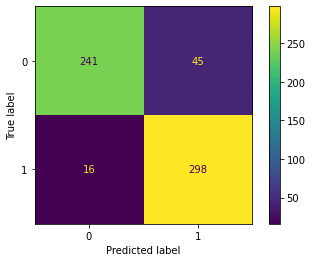

In [12]:
cm = confusion_matrix(y_test, my_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 

In [13]:
print(classification_report(y_test, my_predictions))

              precision    recall  f1-score   support

          No       0.94      0.84      0.89       286
         Yes       0.87      0.95      0.91       314

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600



##### ROC curve

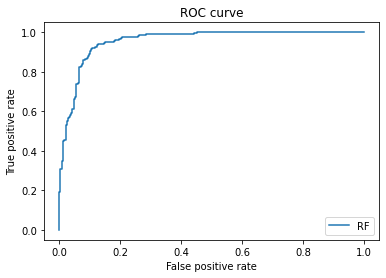

In [17]:
booly_test = y_test.apply(lambda x: x == 'Yes')
newy_test = booly_test.astype(int)
y_pred_rf = rf_proba[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(newy_test, y_pred_rf)

plt.figure(1)
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

##### Look at feature importance

In [ ]:
feature_importances = pd.DataFrame(mytrees.feature_importances_, \
                                   index =X_train.columns,  \
                                   columns=['importance']).sort_values('importance', ascending=False)

In [ ]:
feature_importances.head(20)

### Following graphics are exploring the feature importance

In [ ]:
sns.countplot(customdata['scammer'],hue=customdata['school'])
# There are many more scammers who do not provide a school compared to those who do

In [ ]:
sns.countplot(customdata['scammer'],hue=customdata['hometown'])
# There are many more scammers who do not provide a hometown compared to those who do

In [ ]:
sns.distplot(customdata[customdata['scammer']=="No"].photo_count, hist=False, kde=True, label="Not Scammer")
sns.distplot(customdata[customdata['scammer']=="Yes"].photo_count, hist=False, kde = True, label="Scammer")
# Scammers on average post far fewer images that real users

In [ ]:
sns.boxplot(customdata['scammer'],customdata['photo_count'])
# Scammers on average post far fewer images that real users

In [ ]:
sns.countplot(customdata['scammer'],hue=customdata['gender'])
# Scammers tender to be males users as compared to female users

## Saving Model for future use

In [18]:
import pickle

In [ ]:
filename = 'finalized_rfmodel.sav'
pickle.dump(mytrees, open(filename, 'wb'))
 

#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)